$$Y = X\beta + E$$

där X ör modellspecifikations matrisen, E är vektorn med stokastiska fel med avseeende på väntdevärdet och y är en responds för vektorn för y över hela stickprovet.

# multipel linjär regression

In [14]:
import pandas as pd
import numpy as np

data_path = "/Users/luddecmc/Desktop/SKOLARBETE-ITHS/repos/AI24-Statistiska-metoder/Data"

adv = pd.read_csv(data_path+"/Advertising.csv", index_col=0)
adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [15]:
# responsvektorn/responsvariabeln
Y = adv["sales"]
# designmatris
3
X

array([[  1. , 230.1,  37.8,  69.2],
       [  1. ,  44.5,  39.3,  45.1],
       [  1. ,  17.2,  45.9,  69.3],
       [  1. , 151.5,  41.3,  58.5],
       [  1. , 180.8,  10.8,  58.4],
       [  1. ,   8.7,  48.9,  75. ],
       [  1. ,  57.5,  32.8,  23.5],
       [  1. , 120.2,  19.6,  11.6],
       [  1. ,   8.6,   2.1,   1. ],
       [  1. , 199.8,   2.6,  21.2],
       [  1. ,  66.1,   5.8,  24.2],
       [  1. , 214.7,  24. ,   4. ],
       [  1. ,  23.8,  35.1,  65.9],
       [  1. ,  97.5,   7.6,   7.2],
       [  1. , 204.1,  32.9,  46. ],
       [  1. , 195.4,  47.7,  52.9],
       [  1. ,  67.8,  36.6, 114. ],
       [  1. , 281.4,  39.6,  55.8],
       [  1. ,  69.2,  20.5,  18.3],
       [  1. , 147.3,  23.9,  19.1],
       [  1. , 218.4,  27.7,  53.4],
       [  1. , 237.4,   5.1,  23.5],
       [  1. ,  13.2,  15.9,  49.6],
       [  1. , 228.3,  16.9,  26.2],
       [  1. ,  62.3,  12.6,  18.3],
       [  1. , 262.9,   3.5,  19.5],
       [  1. , 142.9,  29.3,  12.6],
 

$$
\hat{\mathbf{\beta}} = (X^TX)^{-1}X^TY
$$

In [16]:
# koeffecientvektor
b = np.linalg.pinv(X.T @ X) @ X.T @ Y

$$ SSE = (y1 -\hat\beta0 - \hat\beta1 x1)^2 + (y2 - \hat\beta0 - \hat\beta1 x2)^2 + ... + (yn - \hat\beta0 - \hat\beta1 xn)^2$$

In [17]:
#antalet dimensioner/parametrar
k = len(b)-1
n = len(Y) # eller Y.shape[0]
SSE = np.sum(np.square(Y - (X @ b)))

var = SSE/(n-k-1)

# SIGMA HATT KVADRAT
S = np.sqrt(var)


# SSY
Syy = (n*np.sum(np.square(Y)) - np.square(np.sum(Y)))/n

# residual
SSR = Syy - SSE
# eller
SSR_2 = (n*np.sum(b*(X.T @ Y)) - np.square(np.sum(Y)))/n
SSR_2,SSR


(4860.323487097938, 4860.323487097813)

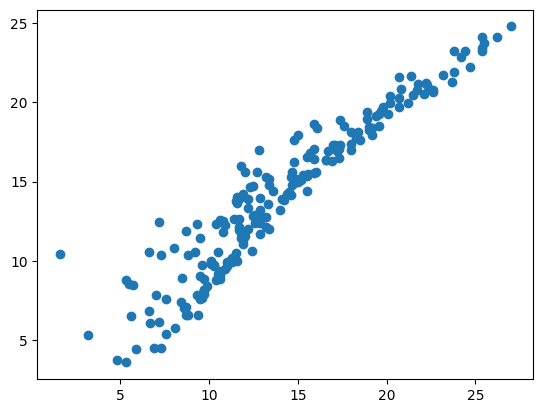

In [20]:
import matplotlib.pyplot as plt


plt.scatter(Y, X@b)

In [21]:
#rkvadrat - konfidensgrad
Rsq = SSR/Syy

Rsq

# avrundad till 90%
# choose 90% as confidence level

0.8972106381789521

In [22]:
import scipy.stats as stats
# signifikanstest
# H0: All \beta = 0
sig_statistic = (SSR/k)/S
p_significance = stats.f.sf(sig_statistic, k, n-k-1)
# p värdet representerar här en sannolikhet
p_significance


6.373276981801313e-117

In [ ]:
# slutsats, extremt låg sannolikhet att H0 är sann, we reject the null hypothesis, regression IS significant

variance / covariance matrix
$$
c = (X^TX)^{-1}\sigma^2
$$

In [33]:
# variance/covariance matrix
c = np.linalg.pinv(X.T @ X)*var

# tittar på newspaper som var minus
b3_statistic = b[3] / (S*np.sqrt(c[3,3]))

# null hypothesis: beta_3 = 0, beta3 är inte signifikant, dvs newspaper är inte signifikant

p_b3 = 2*min(stats.t.cdf(b3_statistic, n-k-1), stats.t.sf(b3_statistic, n-k-1))
p_b3

0.9166073083086514

detta tyder på att b3 är irrelevant